In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [213]:
df = pd.read_csv('assets/data.csv')

In [214]:
df.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
0,592,29,10.30,9.0,352,148,974,623,24.0,47.2,2024-05-22T14:34:1
1,592,29,10.31,10.1,304,136,974,616,23.6,46.8,2024-05-22T14:35:0
2,592,29,4.08,9.9,284,117,974,603,23.5,47.8,2024-05-22T14:36:3
3,592,29,7.86,9.6,266,114,323,599,23.3,47.1,2024-05-22T14:37:1
4,592,29,6.84,8.4,260,116,307,601,23.0,47.1,2024-05-22T14:38:0


In [215]:
df.shape

(589876, 11)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589876 entries, 0 to 589875
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CO2          589876 non-null  int64  
 1   TVOC         589876 non-null  int64  
 2   PM10         589876 non-null  float64
 3   PM2.5        589876 non-null  float64
 4   CO           589876 non-null  int64  
 5   Air Quality  589876 non-null  int64  
 6   LDR          589876 non-null  int64  
 7   O3           589876 non-null  int64  
 8   Temp         589876 non-null  float64
 9   Hum          589876 non-null  float64
 10  ts           589876 non-null  object 
dtypes: float64(4), int64(6), object(1)
memory usage: 49.5+ MB


In [217]:
df.describe()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum
count,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000
mean,596.062072,50.830058,43.469934,18.473955,408.533092,113.971184,895.096527,634.037476,26.356252,45.179883
std,683.037810,465.210328,379.081430,42.088928,119.226035,53.524384,165.804552,66.548247,3.202987,6.695668
min,-32195.000000,-32754.000000,2.500000,0.000000,109.000000,24.000000,8.000000,435.000000,19.300000,24.500000
25%,419.000000,45.000000,5.010000,6.200000,326.000000,66.000000,915.000000,590.000000,24.200000,41.600000
50%,439.000000,50.000000,7.570000,11.500000,407.000000,95.000000,932.000000,632.000000,25.800000,45.100000
75%,481.000000,60.000000,10.130000,20.600000,487.000000,161.000000,945.000000,679.000000,27.900000,48.700000
max,5000.000000,1098.000000,17566.980000,1537.680000,885.000000,373.000000,1000.000000,937.000000,42.800000,85.900000


In [218]:
def categorize_air_quality(value):
    if 0 <= value <= 50:
        return 'Good'
    elif 51 <= value <= 100:
        return 'Moderate'
    elif 101 <= value <= 150:
        return 'Unhealthy for Sensitive'
    elif 151 <= value <= 200:
        return 'Unhealthy'
    elif 201 <= value <= 400:
        return 'Hazardous'
    else:
        return 'Unknown'


In [219]:
df['Air Quality'] = df['Air Quality'].apply(categorize_air_quality)

In [220]:
df.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
0,592,29,10.30,9.0,352,Unhealthy for Sensitive,974,623,24.0,47.2,2024-05-22T14:34:1
1,592,29,10.31,10.1,304,Unhealthy for Sensitive,974,616,23.6,46.8,2024-05-22T14:35:0
2,592,29,4.08,9.9,284,Unhealthy for Sensitive,974,603,23.5,47.8,2024-05-22T14:36:3
3,592,29,7.86,9.6,266,Unhealthy for Sensitive,323,599,23.3,47.1,2024-05-22T14:37:1
4,592,29,6.84,8.4,260,Unhealthy for Sensitive,307,601,23.0,47.1,2024-05-22T14:38:0


### Data explaining :
- `CO2`: Carbon dioxide concentration (ppm – parts per million).
- `TVOC`: Total Volatile Organic Compounds (ppb – parts per billion).
- `PM10`: Particulate Matter with a diameter of 10 micrometers or less (µg/m³).
- `PM2.5`: Fine Particulate Matter with a diameter of 2.5 micrometers or less (µg/m³).
- `CO`: Carbon monoxide concentration (likely in ppm or ppb).
- `Air` Quality: Air quality index or score (higher values might indicate worse air quality).
- `LDR`: Light Dependent Resistor reading (indicates light intensity).
- `O3`: Ozone concentration (likely in ppb).
- `Temp`: Temperature (°C).
- `Hum`: Humidity (%).
- `ts`: Timestamp (date and time of data collection).


## Data preprocessing:

### outlier detection

In [221]:
# List of numerical columns (excluding 'ts' since it's a timestamp)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [222]:
# Detect outliers using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [223]:
IQR

CO2       62.00
TVOC      15.00
PM10       5.12
PM2.5     14.40
CO       161.00
LDR       30.00
O3        89.00
Temp       3.70
Hum        7.10
dtype: float64

In [224]:
# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [225]:
# Find outliers (values outside the range)
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))

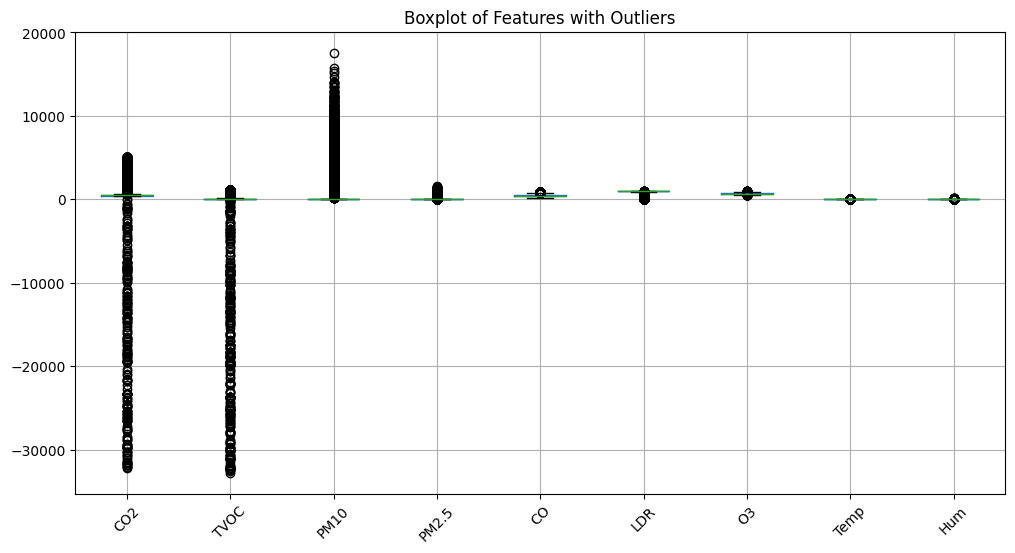

In [226]:
# Draw boxplots
plt.figure(figsize=(12, 6))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot of Features with Outliers")
plt.show()

In [227]:
# Remove outliers
df = df[~outliers.any(axis=1)]  # Keep only non-outlier rows

In [228]:
df.shape[0] - df.shape[0]

0

- 227788 rows detected as outlier, I think they are meannigfull and not anomlies
- Now, we need here Domain Knowledge and Business Logic to know if this portion of data is really outlier or not .

In [229]:
df.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
25,564,24,9.63,5.0,282,Unhealthy for Sensitive,963,570,30.8,40.7,2024-05-22T15:37:2
33,553,23,10.91,4.7,264,Unhealthy for Sensitive,941,540,30.8,39.2,2024-05-22T15:50:0
4366,564,24,5.71,30.4,301,Unhealthy for Sensitive,970,503,32.3,34.5,2024-05-26T08:29:2
4367,556,23,11.84,28.2,286,Unhealthy for Sensitive,975,499,31.5,35.1,2024-05-26T08:30:2
4369,552,23,10.82,29.9,267,Unhealthy for Sensitive,977,505,30.8,35.8,2024-05-26T08:33:1


In [230]:
# Compute outlier severity score (distance from nearest bound)
def compute_outlier_score(row):
    score = 0
    for col in num_cols:
        if row[col] < lower_bound[col]:  # Below lower bound
            score += abs(row[col] - lower_bound[col])
        elif row[col] > upper_bound[col]:  # Above upper bound
            score += abs(row[col] - upper_bound[col])
    return score

# Apply the function to compute scores
df["Outlier_Score"] = df.apply(compute_outlier_score, axis=1)

# Extract and sort the worst 10 outliers
worst_outliers = df[df["Outlier_Score"] > 0].sort_values(by="Outlier_Score", ascending=False).head(10)



In [231]:
worst_outliers

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts,Outlier_Score


- Quetion to be asked to Domain , is these outliers ??!

### feature scaling
- we will use noramliztion

In [61]:
# Apply Min-Max Scaling (0 to 1)
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()

min_max_scaler = MinMaxScaler()
df3 = df2.copy()
df3[num_cols] = min_max_scaler.fit_transform(df2[num_cols])

In [62]:
df3.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
25,0.954955,0.016949,0.713,0.107914,0.275974,0.334532,0.808696,0.304598,0.814286,0.342756,2024-05-22T15:37:2
33,0.905405,0.000000,0.841,0.100719,0.246753,0.309353,0.617391,0.218391,0.814286,0.289753,2024-05-22T15:50:0
4366,0.954955,0.016949,0.321,0.717026,0.306818,0.334532,0.869565,0.112069,0.921429,0.123675,2024-05-26T08:29:2
4367,0.918919,0.000000,0.934,0.664269,0.282468,0.312950,0.913043,0.100575,0.864286,0.144876,2024-05-26T08:30:2
4369,0.900901,0.000000,0.832,0.705036,0.251623,0.370504,0.930435,0.117816,0.814286,0.169611,2024-05-26T08:33:1


In [64]:
df2.describe()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum
count,362087.000000,362087.000000,362087.000000,362087.000000,362087.000000,362087.000000,362087.000000,362087.000000,362087.000000,362087.000000
mean,435.102514,52.145990,7.477735,12.784575,415.090627,112.396523,931.741048,640.297431,25.855270,45.428607
std,28.507495,9.523408,2.900379,9.319876,105.714540,51.730707,19.685061,55.897585,2.388452,5.005261
min,352.000000,23.000000,2.500000,0.500000,112.000000,25.000000,870.000000,464.000000,19.400000,31.000000
25%,415.000000,46.000000,4.960000,5.500000,342.000000,66.000000,920.000000,599.000000,24.000000,42.300000
50%,431.000000,50.000000,7.480000,10.600000,411.000000,86.000000,933.000000,635.000000,25.700000,45.500000
75%,445.000000,57.000000,9.980000,18.100000,483.000000,160.000000,946.000000,679.000000,27.500000,48.600000
max,574.000000,82.000000,12.500000,42.200000,728.000000,303.000000,985.000000,812.000000,33.400000,59.300000
